
# Practical 7
# Case Study

### Context

More and more restaurants are popping up in New York, and busy folks like students and professionals rely on them because of their hectic schedules. Food delivery apps, like FoodHub, make life easier by letting you order from various restaurants all in one place on your phone.

Here's how it works: You order directly through the app, and once the restaurant confirms it, a delivery person from FoodHub is assigned to pick it up. The delivery person uses the app's map to get to the restaurant, picks up the food, and confirms the pick-up on the app. Then, they head over to you to drop off the deliciousness. After handing over the food, they confirm the delivery on the app. You can rate your order, and FoodHub makes money by taking a cut from the delivery charge paid by the restaurant. 

### Objective

The company saved info about orders from their customers on their website. They want to check the data to understand which restaurants are popular, aiming to make customers happier. **Pretend you're a Data Scientist on their team, and they've got specific questions. Analyze the data to help them make their business better.**

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
import warnings 
warnings.filterwarnings("ignore")

# Command to tell Python to actually display the graphs
%matplotlib inline
sns.set()

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('../data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 1898
Number of columns: 9


### Observations: There is a total of 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info

<bound method DataFrame.info of       order_id  customer_id                        restaurant_name   
0      1477147       337525                                Hangawi  \
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating   
0            Korean              30.75         Weekend  No

### Observations: We have 4 numerical columns , 4 object type columns 1 float. Rating shows as an object whereas it has been described as an integer out of 5


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Write your code here
# Checking about null data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Observations: There are no missing value in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# Write your code here
# See the current data distribution of each attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### Observations: Average cost of the order is 16.50,the and maximum is 4.47 and $35.41 respectively. Minimum food preparation is 20 minute with the minimum delivery time of 15 minutes


### **Question 5:** How many orders are not rated?

In [8]:
# Write the code here
print(df['rating'].value_counts())

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [9]:
# Select rows where 'rating' is "Not given"
not_given_rows = df[df['rating'] == 'Not given']
# Print the result
print(not_given_rows.value_counts())

order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.18              Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.18              Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.79              Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.12              Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.12              Weekend          Not given  29                     30               1
                                                                                                         

In [10]:
# Print the count of "Not given" ratings
print("Count of 'Not given' ratings:", len(not_given_rows))

Count of 'Not given' ratings: 736


### Observations: 736 orders were not not rated. 39% of our ratings are not given. It will be risky to impute the ratings because a high number of ratings will be based on imputed data.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [11]:
# Write the code here
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [12]:
# Convert 'cuisine_type', 'day_of_the_week' to category
# Convert Ids to string
df= df.astype({'order_id': str, 'customer_id': str, 'cuisine_type':'category','day_of_the_week':'category'})
df.dtypes

order_id                   object
customer_id                object
restaurant_name            object
cuisine_type             category
cost_of_the_order         float64
day_of_the_week          category
rating                     object
food_preparation_time       int64
delivery_time               int64
dtype: object

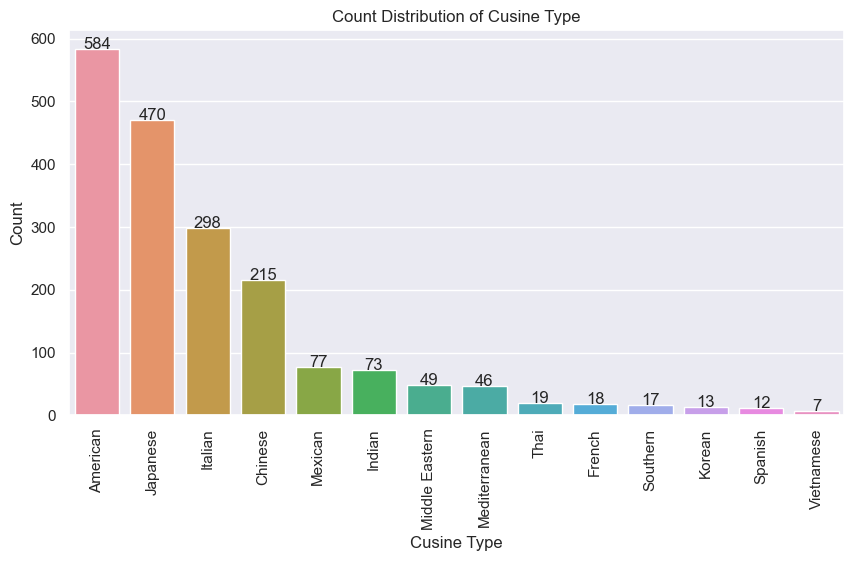

In [13]:
# countplot of all the cuisine types.

# Set the overall figure size
# Adjust the width and height as needed
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x = 'cuisine_type', dodge=False,order=df['cuisine_type'].value_counts().index);

# Adding count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             f'{int(height)}', ha="center")

# Adding labels
plt.xlabel('Cusine Type')
plt.ylabel('Count')
plt.title('Count Distribution of Cusine Type')
plt.xticks(rotation= 90);

### Observations: The American, Japanese, Italian and Chinese cuisines are the popular cuisines respectively

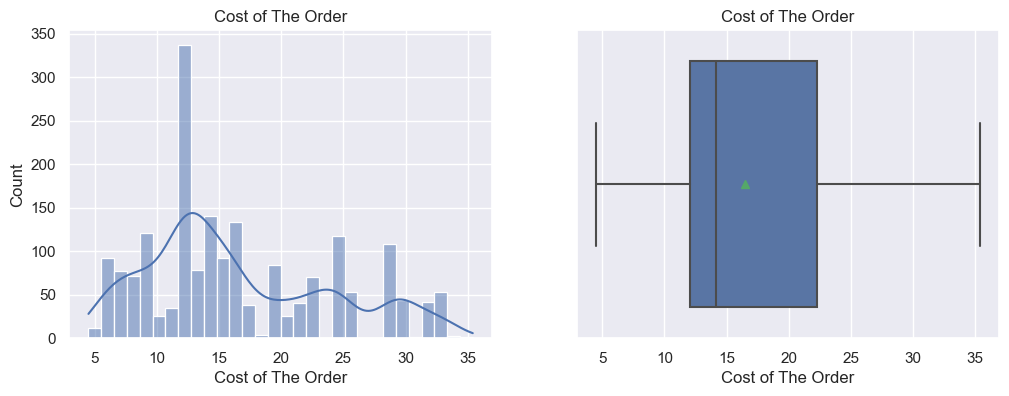

In [14]:
fig2, a2 = plt.subplots(1, 2, figsize=(12, 4))

# First subplot - Histogram
a2[0].set_title('Cost of The Order')
sns.histplot(df['cost_of_the_order'], ax=a2[0], kde=True,bins=30)
a2[0].set_xlabel('Cost of The Order')

# Second subplot - Boxplot
a2[1].set_title('Cost of The Order')
sns.boxplot(x='cost_of_the_order', data=df, showmeans=True, ax=a2[1])
a2[1].set(xlabel='Cost of The Order')

plt.show()

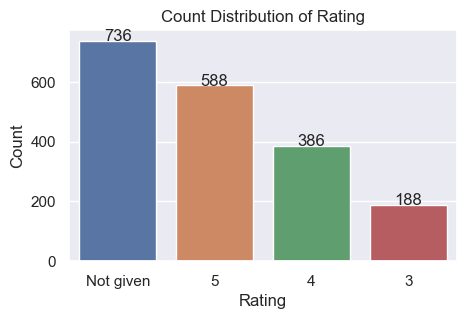

In [15]:
## Count of ratings
total_count = len(df['rating'])

# Adjust the width and height as needed
plt.figure(figsize=(5, 3))

# Create a countplot with actual counts
sns.countplot(x='rating', data=df, dodge=False,order=df['rating'].value_counts().index)

# Adding count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             f'{int(height)}', ha="center")

# Adding labels
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Distribution of Rating')

# Display the plot
plt.show()

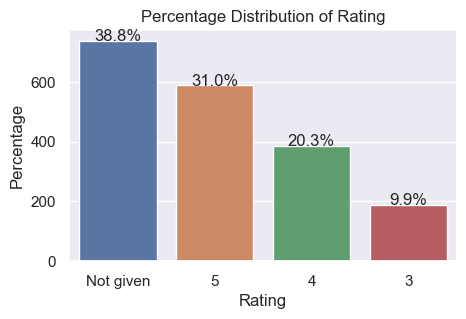

In [16]:
# Assuming df is your DataFrame
total_count = len(df['rating'])

# Adjust the width and height as needed
plt.figure(figsize=(5, 3))

# Create a countplot with percentages
sns.countplot(x='rating', data=df, dodge=False,order=df['rating'].value_counts().index)

# Adding percentage labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             f'{height/total_count:.1%}', ha="center")

# Adding labels
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Rating')

# Display the plot
plt.show()

### Observations on the Rating:
### There is about 38.8% of the customers without any rating given

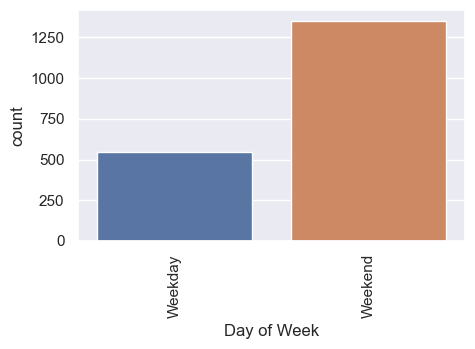

In [17]:
# Adjust the width and height as needed
plt.figure(figsize=(5, 3))
sns.countplot(data=df,x='day_of_the_week').set(xlabel='Day of Week')
plt.xticks(rotation=90)
plt.show()

### Observations on Day of Week:
### There is higher activity over the weekend than during the other weekdays.

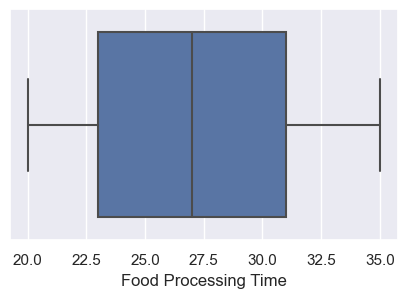

In [18]:
# Food Prepartion Time
# Adjust the width and height as needed
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x='food_preparation_time').set(xlabel='Food Processing Time')
plt.show();

### Observation on Food preparation time:
### There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes

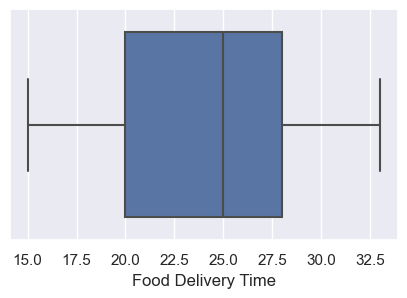

In [19]:
# Food Delivery Time
# Adjust the width and height as needed
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x='delivery_time').set(xlabel='Food Delivery Time')
plt.show();

### Observations on Delivery Time:
### The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [20]:
# grouping the restaurants
df.groupby('restaurant_name').count()[['order_id']].sort_values('order_id', ascending=False).rename({'order_id': 'count'}, axis=1).reset_index().head(5)
df['restaurant_name'].value_counts()[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### Observations:
### Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively and together make up the top 5 restaurants in terms of orders processed

### **Question 8**: Which is the most popular cuisine on weekends?

In [21]:
# Write the code here
# day of the week set up.
df['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekday', 'Weekend']

In [22]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] #specifying which day of the week we are working with.
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### Observations:
### American Cuisine Type is the most popular during the weekends with a count of 415 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [23]:
# Write the code here
#getting cost of orders  greater that $20 and then multiply by 10 t get the percentage
df_greater_than_20 = df[df['cost_of_the_order']>20]
#df_greater_than_20
print('Number of orders that cost over $20 is', df_greater_than_20.shape[0])
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100 #shape 0 is for rows shape 1 is for columns
print("Percentage of orders over $20 is", round(percentage, 2), '%')

Number of orders that cost over $20 is 555
Percentage of orders over $20 is 29.24 %


### Observations:
### 29.24% of Total orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [24]:
# Write the code here
#getting average delivery time
delivery_time = df['delivery_time'].mean()
delivery_time
print('Average delivery time is', round(delivery_time,2), 'minutes')

Average delivery time is 24.16 minutes


### Observations:
### On average it takes 24.16 minutes to have the prepared orders delivered¶

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [25]:
# Write the code here
# FIND TOP 3 CUSTOMERS
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Observations:
### Having extracted the top 3 most frequent customers, it reveals that the top 3 Customer IDs with their orders are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

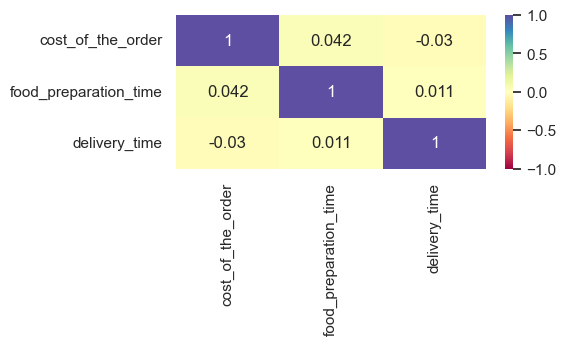

In [26]:
# Write the code here
plt.figure(figsize=(5,2))
# sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

numeric_columns = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


plt.show()

### Observations on the Heatmap and pairplot:

### The heatmap shows very weak correlation between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [27]:
# Write the code here
# getting restaurants with average rating greater than 4 and getting rating count for restaurants and resetting index.
df_ratings = df[['restaurant_name','rating']][df['rating']!= 'Not given'].groupby('restaurant_name').mean()> 4
df_ratings.reset_index(inplace=True)
df_count = df[['rating','restaurant_name']][df['rating']!= 'Not given'].groupby('restaurant_name').count()> 50
df_count.reset_index(inplace=True)
advertised_restaurant = pd.merge(df_count[df_count['rating']== True], df_ratings[df_ratings['rating']== True],on ='restaurant_name')
advertised_restaurant

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


### Observations:
### Four Restaurants namely Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop qualify for the promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [28]:
# Write the code here
# Write the code here
# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

In [29]:
print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


### Observations:
### Given the market differentiation in price, FoodHub collected a total of $ 6163.39 for the orders given

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [30]:
# Write the code here
# Create a new column to hold the computed value for total time required
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
# Review to confirm the new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [31]:
#Compute the percentage of orders taking more than 60 minutes
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

10.54

### Observations:
### About 10.54% of orders take more than 60 minutes to prepare and deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [32]:
# Write the code here
# The code computes the mean delivery time based on the day of the week, however it includes other statistics that maybe useful
# for review alongside the mean
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

### Observations:
### The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34. This is a curious observation especially reviewed against the count, which implies there are fewer orders over the weekdays compared to weekends. Probable explanation would be, there is higher traffic on weekdays than weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

Below is a summary of Key observations and conclusions

*  With rating concentrated around the high score of 5, its possible that mostly its the very satisfied customers that bother to rate the service. However alot of data about (38%) is lost in the unrated orders. A curious question that would arise is whether the unrated orders would skew the rating in a different direction

*  The cost of orders peak at around 12 dollars, there is a slight peak around 25 dollars as well making the observations bimodal.

*  There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends.

*  Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).

### Recommendations:

Based on the observations in this analysis below is recommended.

*  Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible entice them with a reward or follow up to know why they opt not to rate the service. This is so that better data can be available to determine customer satisfaction and enable service improvements.

*  The bimodal peak on the cost of orders processed may imply a differenciated market segment, possibly the peak at 12 dollars has a higher concentration of students with the peak at 25 dollars having a higher concentration of the more affluent professionals. Further analysis of the customers' demographics may better reveal this.

*  Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales.

*  To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service. A curious question also arises on whether the high delivery time is the cause of low orders during the weekdays. A review of whether customers shun ordering on weekdays because they anticipate a longer processing time for their order. Also could weekday traffic be the cause of the higher delivery time on weekdays?


---